In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
file_path ='bank-full.csv'
data = pd.read_csv(file_path)
print(data.head())

  age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0  58;"management";"married";"tertiary";"no";2143...                                                                                                  
1  44;"technician";"single";"secondary";"no";29;"...                                                                                                  
2  33;"entrepreneur";"married";"secondary";"no";2...                                                                                                  
3  47;"blue-collar";"married";"unknown";"no";1506...                                                                                                  
4  33;"unknown";"single";"unknown";"no";1;"no";"n...                                                                                                  


**. Data Cleaning and Preprocessing:**

- Handle missing values: Identify and appropriately handle missing values
- Standardize columns: Ensure all categorical data is standardized (e.g.,
consistent capitalization, removing leading/trailing spaces).
- Perform encoding for y column(categorical)

In [7]:
print(data.isnull().sum())

age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"    0
dtype: int64


#handle all missing values of all columns in data set

In [18]:
from sklearn.preprocessing import LabelEncoder


  age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0  58;"management";"married";"tertiary";"no";2143...                                                                                                  
1  44;"technician";"single";"secondary";"no";29;"...                                                                                                  
2  33;"entrepreneur";"married";"secondary";"no";2...                                                                                                  
3  47;"blue-collar";"married";"unknown";"no";1506...                                                                                                  
4  33;"unknown";"single";"unknown";"no";1;"no";"n...                                                                                                  


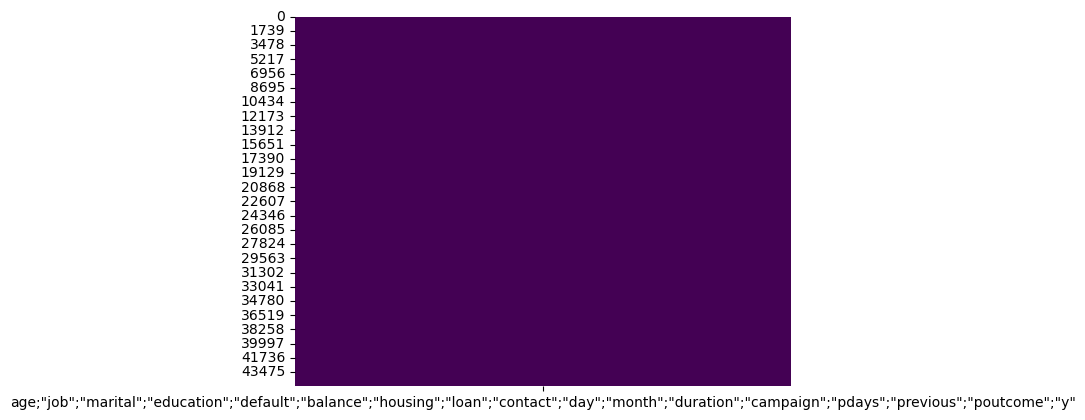

In [20]:
for column in data.columns:
    if data[column].dtype == 'object':  # Check if column is categorical
        data[column] = data[column].fillna(data[column].mode()[0])  # Fill missing with mode
    else:  # Numerical columns
        data[column] = data[column].fillna(data[column].mean())  # Fill missing with mean

# 3. Standardize categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data[col] = data[col].str.strip().str.lower()  # Strip spaces and convert to lowercase

# 4. Encode target variable 'y'
label_encoder = LabelEncoder()  # No more NameError!
if 'y' in data.columns:  # Ensure 'y' exists before applying transformation
    data['y'] = label_encoder.fit_transform(data['y'])  # Convert 'yes' to 1, 'no' to 0

# 5. Display first few rows
print(data.head())

# 6. Visualizing missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

**2. Exploratory Data Analysis (EDA):**

- Demographic Analysis: Analyze the age distribution and identify trends
based on job, marital status, and education.
- Loan Analysis: Investigate the relationship between housing loan and
personal loan status.
- Campaign Analysis: Examine the distribution of campaign contacts and
their success rate.

In [29]:
print(data.columns)

Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')


In [9]:
if 'age' in data.columns:
    # Age Distribution
    plt.figure(figsize=(8, 5))
    sns.histplot(data['age'], bins=30, kde=True, color='blue')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

    # Age Trends By Job
    plt.figure(figsize=(12, 5))
    sns.boxplot(x='job', y='age', data=data)
    plt.xticks(rotation=45)
    plt.title('Age Distribution by Job')
    plt.show()

    # Age Trends by Marital Status
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='marital', y='age', data=data)
    plt.title('Age Distribution by Marital Status')
    plt.show()

    # Age Trends by Education
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='education', y='age', data=data)
    plt.xticks(rotation=45)
    plt.title('Age Distribution by Education Level')
    plt.show()

else:
    print("Error: 'age' column not found in the dataset.")

Error: 'age' column not found in the dataset.


Loan Analysis: Investigate the relationship between housing loan and personal loan status.

In [17]:
data = pd.read_csv('bank-full.csv', delimiter=';')  # Fix delimiter issue


In [19]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [21]:
data.columns = data.columns.str.replace('"', '').str.strip() 

In [23]:
loan_counts = data.groupby(['housing', 'loan']).size().reset_index(name='count')
print(loan_counts)

  housing loan  count
0      no   no  17204
1      no  yes   2877
2     yes   no  20763
3     yes  yes   4367


Vizualize 

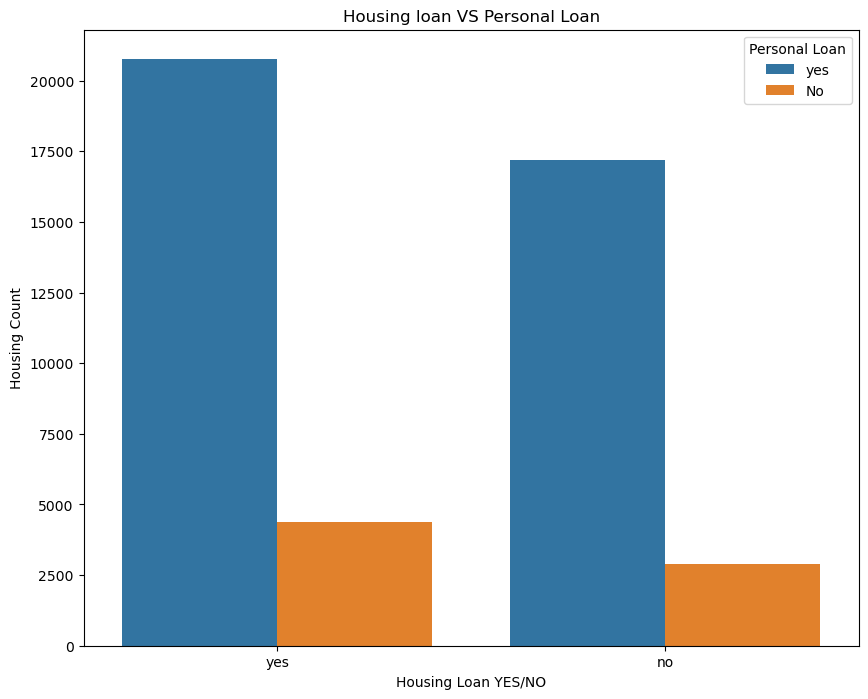

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(x='housing',hue='loan', data=data)
plt.title('Housing loan VS Personal Loan')
plt.xlabel('Housing Loan YES/NO')
plt.ylabel('Housing Count')
plt.legend(title="Personal Loan", labels=["yes","No"])
plt.show()
           
          

Campaign Analysis: Examine the distribution of campaign contacts and
their success rate

Success Rate per Number of Contacts:
 campaign
1     0.145976
2     0.112035
3     0.111936
4     0.090006
5     0.078798
6     0.071263
7     0.063946
8     0.059259
9     0.064220
10    0.052632
Name: y, dtype: float64


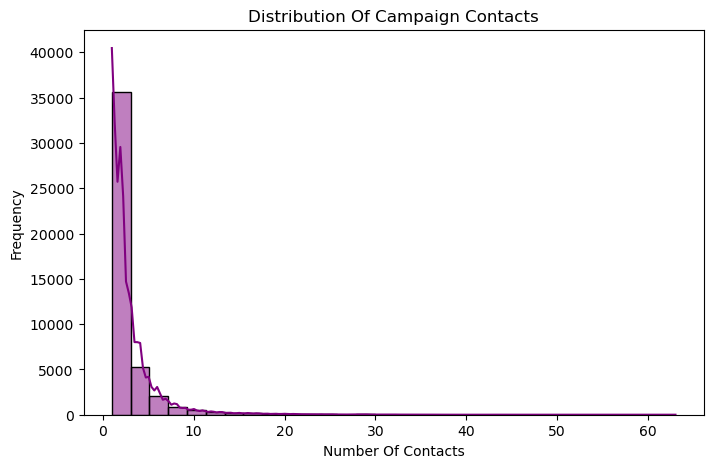

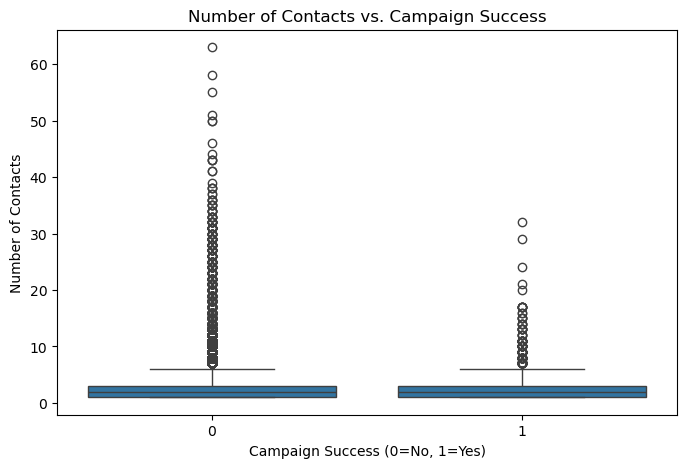

Success Rate per Number of Contacts:
 campaign
1     0.145976
2     0.112035
3     0.111936
4     0.090006
5     0.078798
6     0.071263
7     0.063946
8     0.059259
9     0.064220
10    0.052632
Name: y, dtype: float64


In [36]:
# Convert 'y' column to numeric (1 for 'yes', 0 for 'no')
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Now compute the mean (success rate) per campaign contact count
success_rate = data.groupby('campaign')['y'].mean()

print("Success Rate per Number of Contacts:\n", success_rate.head(10))
#Distribution Of Campaign contacts 
plt.figure(figsize=(8,5))
sns.histplot(data['campaign'], bins=30,kde =True,color='purple')
plt.title('Distribution Of Campaign Contacts')
plt.xlabel('Number Of Contacts')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(8, 5))
sns.boxplot(x='y', y='campaign', data=data)
plt.title('Number of Contacts vs. Campaign Success')
plt.xlabel('Campaign Success (0=No, 1=Yes)')
plt.ylabel('Number of Contacts')
plt.show()
success_rate = data.groupby('campaign')['y'].mean()
print("Success Rate per Number of Contacts:\n", success_rate.head(10)) 

3. Statistical Analysis:
- Hypothesis T esting: Conduct hypothesis testing to determine if there is a
significant difference in balance between clients with and without a housing
loan.
- Correlation Analysis: Analyze the correlation between campaign-related
variables (e.g., duration, number of contacts) and the success rate of term
deposit subscriptions.

In [45]:
#Hypothesis T esting: Conduct hypothesis testing to determine if there is a significant difference in balance between clients with and without a housing loan.
data['y'] = data['y'].map({'yes': 1, 'no': 0})
import scipy.stats as stats
balance_With_Loan =data[data['housing'] == 'yes']['balance']
balance_Without_Loan=data[data['housing']== 'No']['balance']

t_stats,p_value =stats.ttest_ind(balance_With_Loan,balance_Without_Loan,equal_var=False)
print(f"T-Statistic: {t_stats:.4f}")
print(f"P-Value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in balance.")
else:
    print("Fail to reject the null hypothesis: No significant difference in balance.")

T-Statistic: nan
P-Value: nan
Fail to reject the null hypothesis: No significant difference in balance.


In [64]:
data = pd.read_csv("bank-full.csv")  # Replace with actual file

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
data = pd.read_csv('bank-full.csv', delimiter=';')
# Load dataset


categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'balance', 'duration', 'campaign']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

Correlation Matrix:
          duration  campaign   y
duration   1.00000  -0.08457 NaN
campaign  -0.08457   1.00000 NaN
y              NaN       NaN NaN


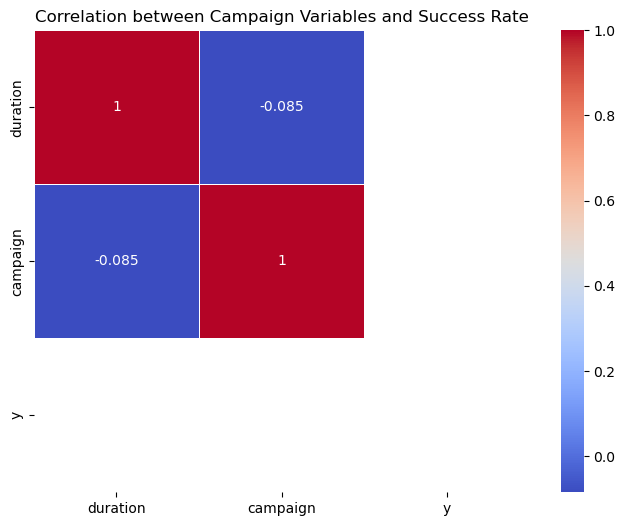

In [47]:
#Correlation Analysis: Analyze the correlation between campaign-related variables (e.g., duration, number of contacts) and the success rate of term deposit subscriptions.

Machine Learning:
- Predictive Modeling: Build a classification model to predict whether a
client will subscribe to a term deposit based on the provided features.
Evaluate the model using appropriate metrics (e.g., accuracy, precision,
recall).

In [68]:
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'balance', 'duration', 'campaign']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [70]:
X = data.drop(columns=['y'])
y = data['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

KeyError: "['y'] not found in axis"

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))